### Tensor Flow

In [1]:
# pip install tensorflow==1.15
import tensorflow as tf

The objective of this project is to create a machine learning model that can distinguish the type of traffic sign by an image. In the dataset the images have different sizes, different lighting and different types of colors.

### Traffic signals

The photos that we are going to analyze are inside folders that, in turn, are inside other folders. So what I'm going to have to do is a for loop with which I will go through all the folders to load the images one by one

In [2]:
import os
import skimage

In [3]:
def load_data(data_directory):
    dirs= [d for d in os.listdir(data_directory) 
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels=[]
    images=[]
    
    for d in dirs:
        label_dir = os.path.join(data_directory,d)
        file_names=[os.path.join(label_dir,f)
                   for f in os.listdir(label_dir)
                   if f.endswith(".ppm")]
        
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
        
    
    return images,labels

In [4]:
main_dir= "C:/Users/Usuario/Desktop/Anaconda/dataset/python-ml-course-master/datasets/belgian/"

train_data_dir= os.path.join(main_dir,"Training")

test_data_dir= os.path.join(main_dir,"Testing")

In [5]:
train_data_dir

'C:/Users/Usuario/Desktop/Anaconda/dataset/python-ml-course-master/datasets/belgian/Training'

In [6]:
images,labels=load_data(train_data_dir)

In [7]:
len(images)

4575

In [8]:
type(labels)

list

The first thing I'm going to do is convert "images" and "labels" into arrays that I can handle

In [9]:
import numpy as np

In [10]:
images = np.array(images)

In [11]:
labels = np.array(labels)

In [12]:
images.size

4575

In [13]:
images.ndim

1

This means that in our array we have a single column with 4575 images.

To know what the different images are we have to put:

In [14]:
len(set(labels))

62

Which tells me that there are 62 different labels for the 4575 images.


To know how much memory the entire image dataset occupies, I can use the following commands:


In [15]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [16]:
images.itemsize

8

In [17]:
images.nbytes

36600

In [18]:
images.nbytes/images.itemsize

4575.0

In [19]:
import matplotlib.pyplot as plt

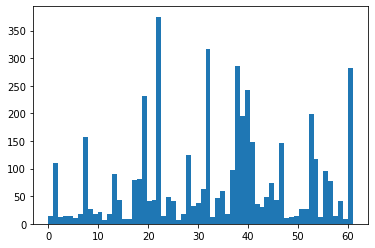

In [20]:
plt.hist(labels,len(set(labels)))
plt.show()

In this graph I can see that not all image types are represented equally well in the dataset. Some images have a lot of images to analyze while others have very few.


I'm going to load 6 random images:

In [21]:
import random

In [22]:
rand_signs= random.sample(range(0,len(labels)), 6)

rand_signs

[2942, 2495, 4225, 2282, 1272, 1856]

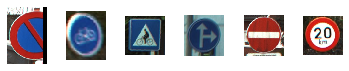

In [23]:
for i in range(len(rand_signs)):
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(images[rand_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
plt.show()

I can see that the sizes of the images are not the same. This is very important because the model that we are going to create cannot be guided by the size of the images.

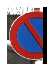

Forma:(193, 134, 3), min:0, max:255


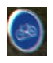

Forma:(63, 51, 3), min:0, max:255


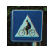

Forma:(95, 95, 3), min:3, max:224


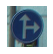

Forma:(83, 81, 3), min:17, max:198


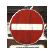

Forma:(140, 133, 3), min:8, max:255


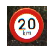

Forma:(87, 87, 3), min:0, max:255


In [24]:
for i in range(len(rand_signs)):
    temp_img=images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_img)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print("Forma:{0}, min:{1}, max:{2}".format(temp_img.shape,
                                              temp_img.min(),
                                              temp_img.max()))

In [25]:
unique_labels=set(labels)

plt.figure(figsize=(16,16))

i=1

for label in unique_labels:
    temp_img=images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label,list(labels).count(label)))
    i+=1
    plt.imshow(temp_img)

plt.show()

### Neural Network Model with TensorFlow

Conclusions:

* Images not all the same size
* There are 62 kinds of images (from 0 to 61)
* The distribution of traffic signs is not uniform (some go out more times than others)

The first thing I'm going to do is transform the colors of our images to grayscale. This is because using color as a decision rule is not very useful because the level of illumination of the person taking the photo influences too much and can influence the prediction of the model.

In [26]:
from skimage import transform

Next, I'm going to resize all the images so they are the same size:

#### First I will see what are the dimensions of the smallest image to see how I resize all the images

In [27]:
w= 9999
h=9999


for image in images:
    if image.shape[0]<h:
        h=image.shape[0]
    if image.shape[1]<w:
        w=image.shape[1]

print("Minimum size: {0}x{1}".format(h,w))

Minimum size: 22x20


Seeing the result that the smallest image has given, I decide that all the images will have a size of 30x30

In [28]:
images30=[transform.resize(image,(30,30)) for image in images]

In [29]:
def show_random_images(images,n):

    rand_signs= random.sample(range(0,len(labels)), n)

    rand_signs

    for i in range(len(rand_signs)):
        temp_img=images[rand_signs[i]]
        plt.subplot(1,n,i+1)
        plt.axis("off",cmap="gray")
        plt.imshow(temp_img)
        plt.subplots_adjust(wspace=0.5)
        plt.show()

        print("Forma:{0}, min:{1}, max:{2}".format(temp_img.shape,
                                                  temp_img.min(),
                                                  temp_img.max()))

Forma:(30, 30, 3), min:0.05758169934640523, max:0.996078431372549


Forma:(30, 30, 3), min:0.06274509803921569, max:0.6218169934640524


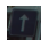

Forma:(30, 30, 3), min:0.06686274509803904, max:0.43928431372549015


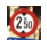

Forma:(30, 30, 3), min:0.06666666666666667, max:0.996078431372549


Forma:(30, 30, 3), min:0.08064923747276688, max:0.9921568627450981


Forma:(30, 30, 3), min:0.03392156862745095, max:0.9905686274509805


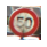

Forma:(30, 30, 3), min:0.13156862745098036, max:0.996078431372549


In [30]:
show_random_images(images30,7)

#### Second I am going to change the colors to grayscale.

In [31]:
from skimage.color import rgb2gray

In [32]:
images30=np.array(images30)

images30= rgb2gray(images30)

Forma:(30, 30), min:0.03619522875816995, max:0.8492186100217859


Forma:(30, 30), min:0.0938957764705883, max:0.941708009803922


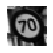

Forma:(30, 30), min:0.08195740784313744, max:0.9422926274509804


Forma:(30, 30), min:0.0, max:0.8103493627450975


Forma:(30, 30), min:0.05883709150326795, max:0.8924488217864919


Forma:(30, 30), min:0.1389775277777777, max:0.5772900462962962


In [33]:
rand_signs= random.sample(range(0,len(labels)), 6)

rand_signs

for i in range(len(rand_signs)):
    temp_img=images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_img, cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print("Forma:{0}, min:{1}, max:{2}".format(temp_img.shape,
                                              temp_img.min(),
                                              temp_img.max()))

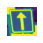

Forma:(30, 30), min:0.23999966535947706, max:0.996078431372549


Forma:(30, 30), min:0.13273399346405235, max:0.9984393147058823


Forma:(30, 30), min:0.12087154901960791, max:0.996078431372549


Forma:(30, 30), min:0.11127953594771249, max:0.6093422156862744


Forma:(30, 30), min:0.07020306666666669, max:0.912289573856209


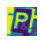

Forma:(30, 30), min:0.17191555555555615, max:0.9969086535947713


Forma:(30, 30), min:0.04600379575163396, max:0.9958663725490196


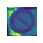

Forma:(30, 30), min:0.1332294307189544, max:0.9271969803921571


In [34]:
show_random_images(images30,8)

#### Predicción

In [35]:
x= tf.placeholder(dtype=tf.float32,shape=[None,30,30])
y= tf.placeholder(dtype=tf.int32,shape=[None])


images_flat= tf.contrib.layers.flatten(x)
logits= tf.contrib.layers.fully_connected(images_flat,62,tf.nn.relu)

loss=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits))

train_opt=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred=tf.argmax(logits,1)

accuracy= tf.reduce_mean(tf.cast(final_pred,tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [36]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [50]:
tf.set_random_seed(1234)

sess=tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(300):

    _,accuracy_val=sess.run([train_opt,accuracy],
                           feed_dict={
                               x:images30,
                               y:list(labels)
                           })
    
    _,loss_val=sess.run([train_opt,loss],
                           feed_dict={
                               x:images30,
                               y:list(labels)
                           })
    

    if i%10==0:
        print("ECPOH",i)
        print("Eficacia: ",accuracy_val)
        print("Pérdidas: ",loss_val)
    
    print("Fin del ECPOH ",i)
    
    


ECPOH 0
Eficacia:  47.53224
Pérdidas:  4.0160847
Fin del ECPOH  0
Fin del ECPOH  1
Fin del ECPOH  2
Fin del ECPOH  3
Fin del ECPOH  4
Fin del ECPOH  5
Fin del ECPOH  6
Fin del ECPOH  7
Fin del ECPOH  8
Fin del ECPOH  9
ECPOH 10
Eficacia:  34.163498
Pérdidas:  3.17566
Fin del ECPOH  10
Fin del ECPOH  11
Fin del ECPOH  12
Fin del ECPOH  13
Fin del ECPOH  14
Fin del ECPOH  15
Fin del ECPOH  16
Fin del ECPOH  17
Fin del ECPOH  18
Fin del ECPOH  19
ECPOH 20
Eficacia:  33.993225
Pérdidas:  2.7036617
Fin del ECPOH  20
Fin del ECPOH  21
Fin del ECPOH  22
Fin del ECPOH  23
Fin del ECPOH  24
Fin del ECPOH  25
Fin del ECPOH  26
Fin del ECPOH  27
Fin del ECPOH  28
Fin del ECPOH  29
ECPOH 30
Eficacia:  34.59672
Pérdidas:  2.407476
Fin del ECPOH  30
Fin del ECPOH  31
Fin del ECPOH  32
Fin del ECPOH  33
Fin del ECPOH  34
Fin del ECPOH  35
Fin del ECPOH  36
Fin del ECPOH  37
Fin del ECPOH  38
Fin del ECPOH  39
ECPOH 40
Eficacia:  34.53377
Pérdidas:  2.2134907
Fin del ECPOH  40
Fin del ECPOH  41
Fin de

### Neural network evaluation

In [51]:
sample_idx= random.sample(range(len(images30)),16)
sample_images=[images30[i] for i in sample_idx]
sample_labels= [labels[i] for i in sample_idx]


In [52]:
sample_labels

[19, 30, 32, 28, 40, 42, 8, 21, 32, 1, 54, 53, 45, 61, 61, 39]

In [53]:
prediction= sess.run([final_pred],feed_dict={
    x:sample_images
})[0]


In [54]:
prediction

array([19, 30, 32, 28, 40, 42, 13, 21, 32,  1, 54, 53, 40, 61, 61, 39],
      dtype=int64)

In [55]:
sample_labels

[19, 30, 32, 28, 40, 42, 8, 21, 32, 1, 54, 53, 45, 61, 61, 39]

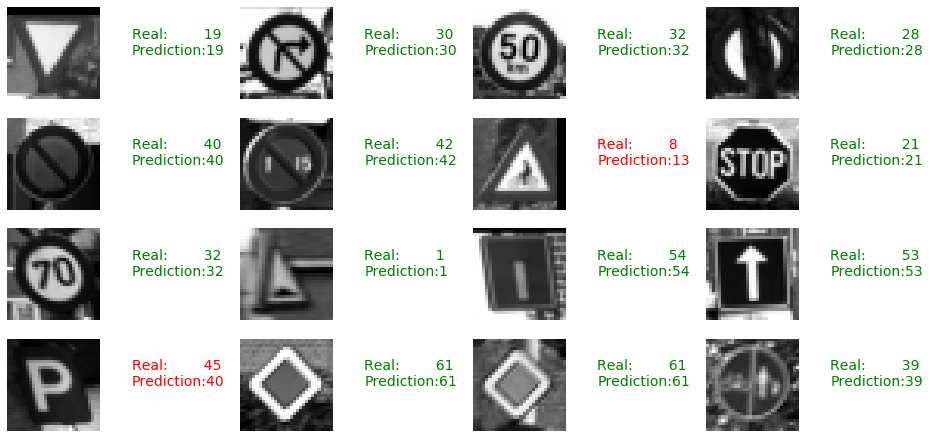

In [56]:
plt.figure(figsize=(16,20))

for i in range(len(sample_images)):
    
    truth= sample_labels[i]
    
    predi= prediction[i]
    
    plt.subplot(10,4,i+1)
    
    plt.axis("off")
    
    if(truth==predi):
        color="green"
    else:
        color="red"
        
    
    plt.text(40,15,"Real:        {0}\nPrediction:{1}".format(truth,predi),
            fontsize=14,color = color)
    
    plt.imshow(sample_images[i],cmap="gray")
    
plt.show()

In [57]:
test_images,test_labels= load_data(test_data_dir)

In [58]:
test_images30= [transform.resize(im,(30,30)) for im in test_images]

In [59]:
test_images30=rgb2gray(np.array(test_images30))

In [60]:
prediction=sess.run([final_pred],feed_dict={x:test_images30})[0]

In [61]:
match_count=sum([int(l0==lp) for l0, lp in zip(test_labels,prediction)])
match_count

1886

In [62]:
acc= match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 74.84


The hit percentage is 74.84%. It is not a very good result because it means that out of every 100 road signs analyzed, the model will predict 62 good and 38 bad.